## Review on basic Python data visualziation and data summary 

### Goal for today： 

- Review on basic data structure
- Understand basic rules to choose figure type
- Learn how to describe data and simple figures 
- Review basic plotting options in Python (matplotlib and seaborn)


### Describing a data set

In a data table (also called ``data matrix"), like the one below. There are two dimensions in the data: 

- Observations: each individual subject, case, or sample point (rows, represented with $n$)
- Variables/Feature: characteristics that are recorded for each subject in the sample (columns, represented with $p$)


In [1]:
import pandas as pd

df = pd.read_csv("ICUAdmissions.csv")
print(df.head())

   ID  Status  Age  Sex  Race  Service  Cancer  Renal  Infection  CPR  ...  \
0   8       0   27    1     1        0       0      0          1    0  ...   
1  12       0   59    0     1        0       0      0          0    0  ...   
2  14       0   77    0     1        1       0      0          0    0  ...   
3  28       0   54    0     1        0       0      0          1    0  ...   
4  32       0   87    1     1        1       0      0          1    0  ...   

   HeartRate  Previous  Type  Fracture  PO2  PH  PCO2  Bicarbonate  \
0         88         0     1         0    0   0     0            0   
1         80         1     1         0    0   0     0            0   
2         70         0     0         0    0   0     0            0   
3        103         0     1         1    0   0     0            0   
4        154         1     1         0    0   0     0            0   

   Creatinine  Consciousness  
0           0              1  
1           0              1  
2           0    

### Describing variables

There are at least two ways to describe variables:
		
By value type:
		
- Numerical variables: take on numerical values with meaning Mathematical operations like addition, etc. must make sense
- Categorical variables: take on names, categories, or labels Categories are sometimes represented by numbers...

By function:
		
- Response variable/Target: defined by the particular research question a study seeks to address, and measures the outcome of interest in the study
- Explanatory variable/Feature: a secondary variable(s) that explains changes in the response variable

### Important terminology clarification

- feature
- variable
- attribute

### In-class activities

Suppose my research question is "What factors may be related to the heart rate in ICU admissions?" Try to make three data viasualizations. 

Things you need to decide: 
- What features I want to choose for the data visualizaiton?
- What type of figures I will choose? 
- What information I want to achieve from the data visualization?
- ......


In [1]:
# Example 1: 

In [2]:
# Example 2: 

In [3]:
# Example 3: 

# Basic data visualization choices

#### Here is a general guidline for the type of plots: 

- One categorical: bar plot
- One continous: histogram/density plot/boxplot
- Two continous: scatter plot
- One categorical and one continous: side-by-side boxplot
- Two categorical: side-by-side bar plot 

#### One categorical: bar plot

NameError: name 'value' is not defined

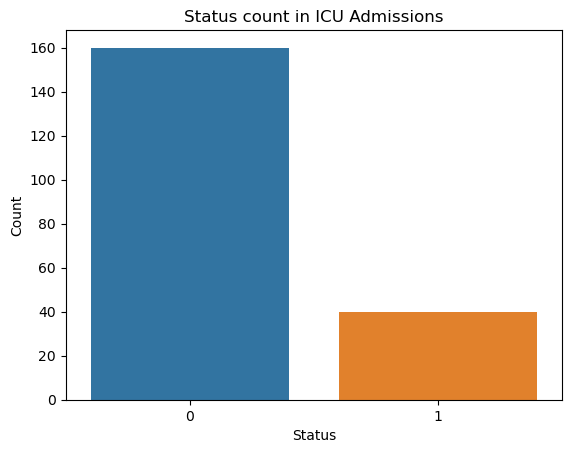

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = 'Status', data = df)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Status count in ICU Admissions')
status_counts = df['Status'].value_counts()

for i, in value in enumerate(status_counts.values):
    plt.text(i, value+1, f'{value}', ha = 'center')
plt.show()

In [12]:
status_counts = df['Status'].value_counts()
status_counts

Status
0    160
1     40
Name: count, dtype: int64

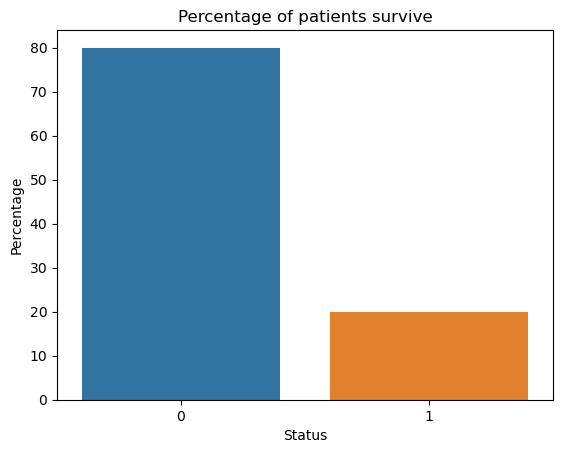

In [26]:
status_counts = df['Status'].value_counts(normalize = True) * 100
status_counts

sns.barplot(x = status_counts.index, y = status_counts.values)
plt.xlabel('Status')
plt.ylabel('Percentage')
plt.title('Percentage of patients survive')
plt.show()

##### What to write about a bar plot

- What is the plot abut?
- Percentage/Count for each group
- Whether there s a clear difference between the groups

The figure is about the number of people which survived ICU admissions. Status '0' means the patient has survived in the ICU while the status '1' means the patient did not. Among 200 patients, there are 160 (80%) of them survived while 40 (20%) of them died. It is clear we have more people survive than died in the data.

#### One continous: histogram/density plot/boxplot

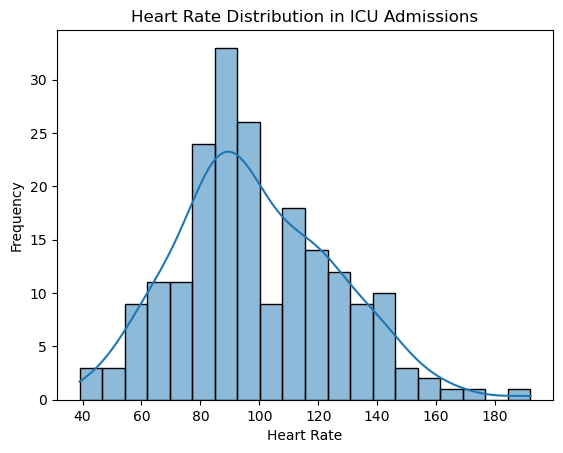

In [81]:
sns.histplot(df['HeartRate'], bins = 20, kde = True, edgecolor = 'black')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.title('Heart Rate Distribution in ICU Admissions')
plt.show()

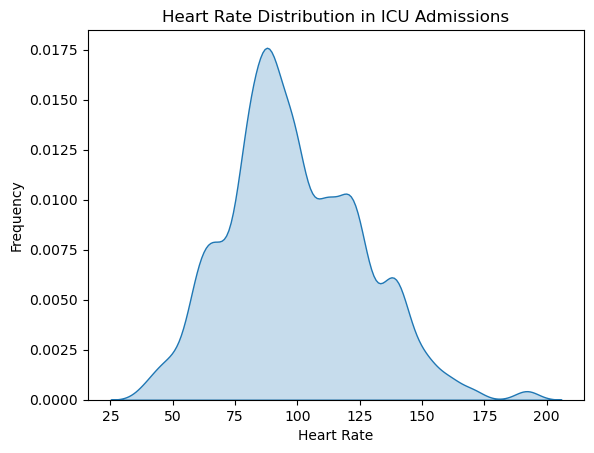

In [67]:
sns.kdeplot(df['HeartRate'], fill = True, bw_adjust = 0.5)
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.title('Heart Rate Distribution in ICU Admissions')
plt.show()

Text(0.5, 1.0, 'Boxplot for Heart Rate in ICU Admissions')

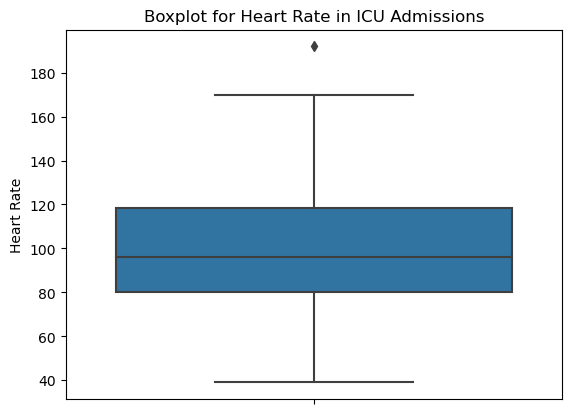

In [75]:
sns.boxplot(y = 'HeartRate', data = df)
plt.ylabel('Heart Rate')
plt.title('Boxplot for Heart Rate in ICU Admissions')

In [99]:
df['HeartRate'].describe()

count    200.00000
mean      98.92500
std       26.82962
min       39.00000
25%       80.00000
50%       96.00000
75%      118.25000
max      192.00000
Name: HeartRate, dtype: float64

##### Difference between histogram/density plot/ boxplot

- Histograms and density plot emphasizes on the distribution (shape) of the data
- Boxplot emphasizes on the statistics of the data (median, IQR) 
- Boxplot cannot catch the shape information, like the bi-mode
- Histogram needs to choose the bin number while density plots need to choose the bandwidth
- If you have multiple groups, boxplot and density lines will be preferred since it s easier to place them side by side

##### Difference between histogram and bar plot

- Histogram is for the numerical variable while the bar plot is for the categorical one
- Histogram is almost always vertical while bar plot can be horizontal
- Histogram usually does not have spaces between bars while a bar plot does
- Histogram bars can never change the order but a bar plot can


##### What to write about a histogram/density plot

- What the plot is about?
- Shape (skewness and mode)
- Potential outliers
- Majority of the data (typical value: mean $\pm$ sd)

<img src="https://www.biologyforlife.com/uploads/2/2/3/9/22392738/c101b0da6ea1a0dab31f80d9963b0368_orig.png" width="700" height="300">

EX: This is a histogram for the heart rate distribution in ICU admissions. The distribution has a uni-mode shape and is slightly sewed to the right, which means it may have a potential outlier with a larger value. The typical value is within the range 98.9 $\pm$ 28.6

##### What to write about a box plot

- What is the plot about?
- Can also talk about the skewness but not the shape
- Potential outliers
- Majority of the data (IQR)

EX: The figure is the boxplot for the heartrate distribution in ICU Admissions. The distribution is slightly skewed to the fight with a potential outlier on the larger values. The IQR range is fro 80 to 118.25

#### Two continous: scatter plot

Text(0.5, 1.0, 'Scatter plot between Age and Heart Rate in ICU Admissions')

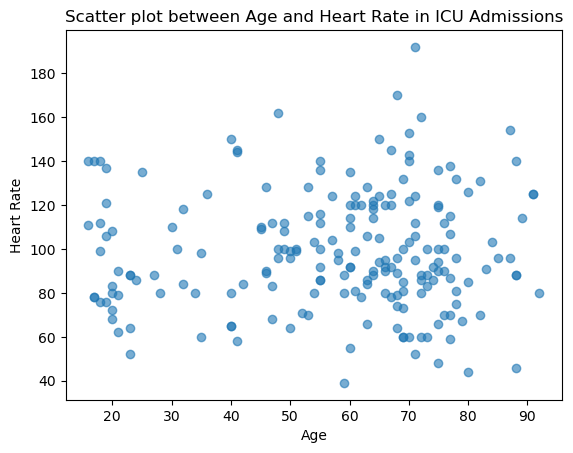

In [117]:
plt.scatter(df['Age'], df['HeartRate'], alpha = 0.6)
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.title('Scatter plot between Age and Heart Rate in ICU Admissions')

##### What to write about a scatter plot

- What is the plot about?
- Trend (linear or non-linear: is it quadratic, min or max value?) 
- Potential outliers or clusters


EX: The figure is a scatter plot between age and heart rate in ICU Admissions. There is no clear liner or non-linear trends in the data and there is no clear potential outliers. There might be a cluster for the age 60 to 80 and heart rate around 100.

#### One categorical and one continous: side-by-side boxplot

Other choices include side-by-side histogram and side-by-side density plot

Text(0.5, 1.0, 'Scatter plot between Status and Heart Rate in ICU Admissions')

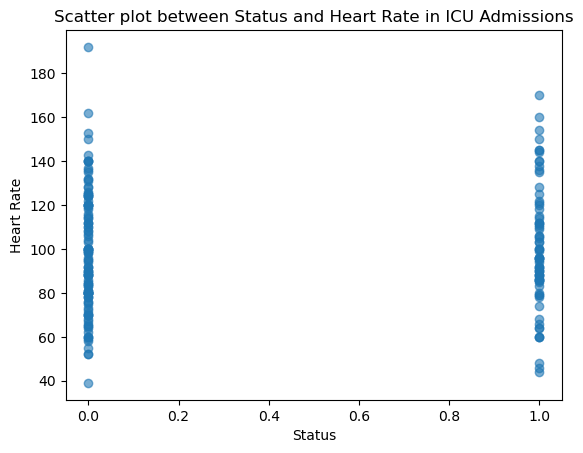

In [123]:
plt.scatter(df['Sex'], df['HeartRate'], alpha = 0.6)
plt.xlabel('Status')
plt.ylabel('Heart Rate')
plt.title('Scatter plot between Status and Heart Rate in ICU Admissions')

### One categorical value and one continous: side-by-side boxplot
#### Other choices include a side-by-side histogram/density plot

Text(0.5, 1.0, 'Heart Rate distribution by status in ICU Admissions')

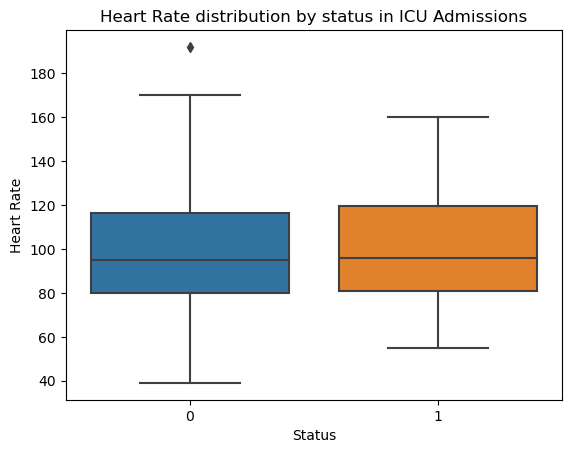

In [134]:
sns.boxplot(x = 'Status', y = 'HeartRate', data = df)
plt.xlabel('Status')
plt.ylabel('Heart Rate')
plt.title('Heart Rate distribution by status in ICU Admissions')

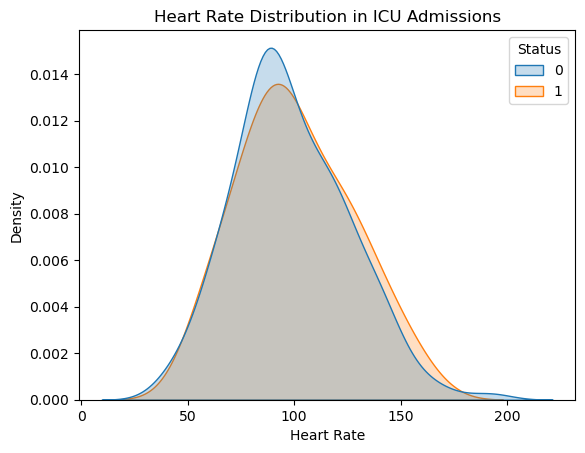

In [142]:
sns.kdeplot(data = df, x = 'HeartRate', hue = 'Status', common_norm = False, fill = True)
plt.xlabel('Heart Rate')
plt.ylabel('Density')
plt.title('Heart Rate Distribution in ICU Admissions')
plt.show()

##### What to write about a side-by-side boxplot or density plot

- What is the plot about?
- Highlight the comparison
- For boxplots, declare whether the box parts are overlapped


EX: The figure is the side-by-side boxplot for Heart rate vs Status. The box parts parts are overlapped, which means there is no significant difference between the heart rate across the different status

#### Two categorical: side-by-side bar plot

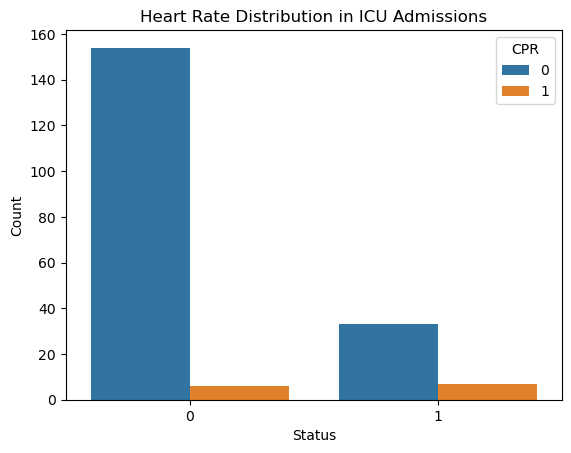

In [18]:
df['CPR'] = df['CPR'].astype('str')
sns.countplot(x = 'Status', hue = 'CPR', data = df)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('CPR ICU Admissions')
plt.show()

In [44]:
#proportion_table = pd.crosstab(df['Status'], df['CPR'])
#proportion_table = pd.crosstab(df['Status'], df['CPR'], normalize = 'all') <-- percentage
proportion_table = pd.crosstab(df['Status'], df['CPR'], normalize = 'index')
proportion_table

CPR,0,1
Status,,
0,0.770,0.030
1,0.165,0.035


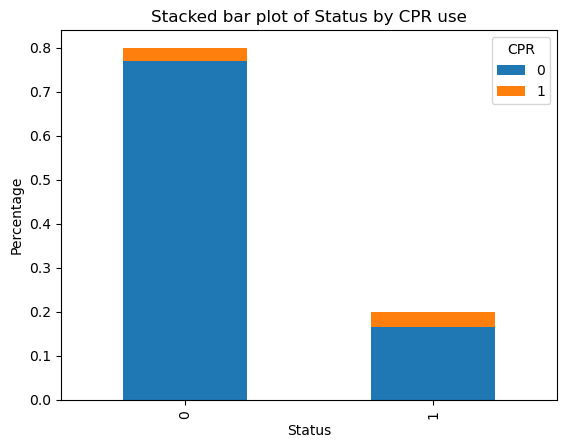

In [46]:
proportion_table.plot(kind = 'bar', stacked = True)
plt.xlabel('Status')
plt.ylabel('Percentage')
plt.title('Stacked bar plot of Status by CPR use')
plt.show()

##### What to write about a side-by-side bar plot

- What is the plot about?
- Highlight the difference

EX: The figure s a stacked bar plot between patient status and their CPR use in ICU Admissions. The color indicates whether the patient has received CPR in the ICU. In the figure, the distribution of CPR use is different for the survival group and non-survival group. There is a much higher percentage of people who have survived that have not received CPR. It seems that there is a correlation between the survival and CPR use but does not show that one causes the other.

### In-class activities: Try to make data visualizaitons by yourself

See the data with about Titanic. Try to make three data visualization to study how other features affect the "survived" (whether the person survived from the Titanic disaster). Once you finish, show your figures to the neighbors and describe the figures to them. 

Note: This is not a complete data, feel free to remove the missing valuesv(or do any other data pre-processing) before you making the plots. 

In [611]:
df = sns.load_dataset('titanic')
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


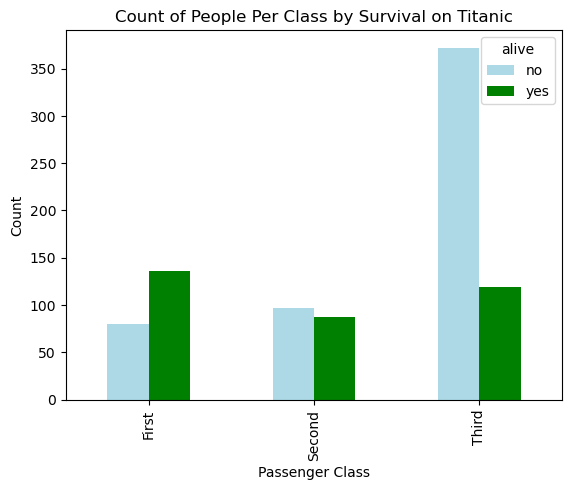

In [634]:
class_table = pd.crosstab(df['class'], df['alive'])

class_table.plot(kind = 'bar', color= ['lightblue', 'green'])
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Count of People Per Class by Survival on Titanic')
plt.show()

The figure is a side-by-side bar plot between passenger classes and their count of passengers on the Titanic. The color indicates whether the passenger has survived the Titanic sinking. In the figure, the distribution of passenger survival is different for the three passenger groups. There is a much higher proportion of people who have died in third class, while in first class most of the passengers survived. It seems that there is a some correlation between the passenger class and survival rate but does not show that one causes the other. For example, one class might have a higher proportion of women which were originally allowed to escape the sinking first.

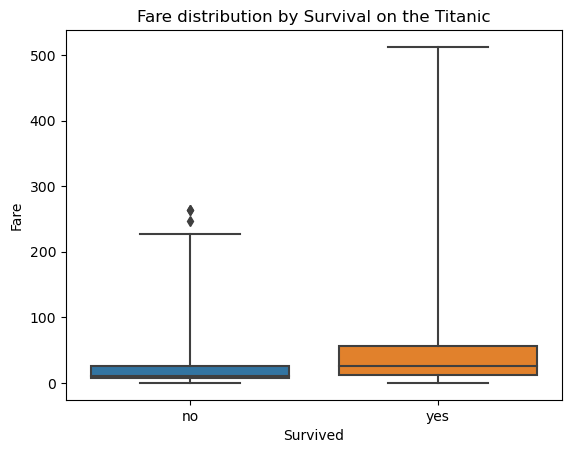

In [616]:
sns.boxplot(x = 'alive', y = 'fare', data = df, whis = 12)
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title('Fare distribution by Survival on the Titanic')
plt.show()

The figure represents the distribution of fares paid by passengers on the Titanic, separated by their survival status. The boxplot on the left illustrates the fares for those who did not survive, while the one on the right shows fares for survivors. The median fare for survivors is higher than for non-survivors, suggesting a possible association between higher fares and survival. The range of fares for survivors is much wider, indicating a broader variability in fares paid by this group. There are outliers in both groups, with particularly high fares among some survivors.

In [619]:
#gender_percent = pd.crosstab(df['sex'], df['alive'])
gender_percent = pd.crosstab(df['sex'], df['survived'], normalize = 'index') * 100
gender_percent

survived,0,1
sex,,
female,25.796178,74.203822
male,81.109185,18.890815


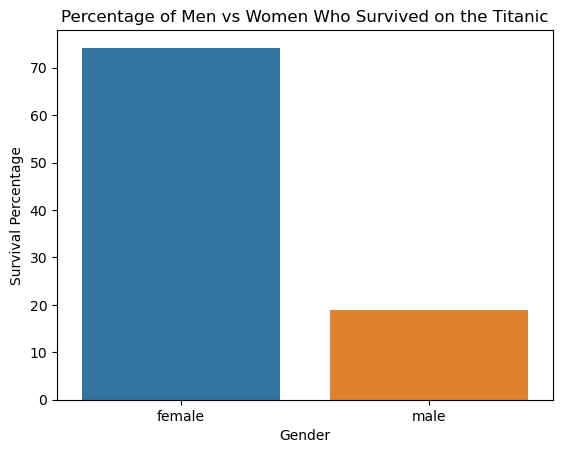

In [621]:
gender_percent = gender_percent[1]
sns.barplot(x = gender_percent.index, y = survival_percentages.values)
plt.xlabel('Gender')
plt.ylabel('Survival Percentage')
plt.title('Percentage of Men vs Women Who Survived on the Titanic')
plt.show()

The figure is about the percentage of people by gender which survived the Titanic sinking. The bar on the left shows the percentage of women who have survived and the bar on the right shows men. Among 891 passengers, there are 233 (74%) of women who survived and 109 (19%) of men that survived. A majority percentage of women survived while a majority percentage of men did not. It is clear we have more women than men survive by percentage in the sinking of the Titanic data.

#### Other options

Matplotlib and seaborn also allow you to do some level of customization. 
Read the documents here to change color/size/shape for your plot. Save your work to submit to the quiz later. 

https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html


### Conclusion

- One categorical: bar plot
- One continous: histogram/density plot/boxplot
- Two continous: scatter plot
- One categorical and one continous: side-by-side boxplot
- Two categorical: side-by-side bar plot

But, wait, why?

In-class activities: discuss what other options you want to have for your plots?